# The Perceptron Algorithm
This notebook demonstrates the Perceptron algorithm on a real-world binary classification dataset (Breast Cancer Wisconsin dataset from sklearn).

In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

## Load and Prepare the Data

In [11]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Implement the Perceptron Algorithm

In [12]:
class Perceptron:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        y_ = np.where(y <= 0, -1, 1)
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.where(linear_output >= 0, 1, -1)
                update = self.lr * (y_[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

## Train and Evaluate the Perceptron

In [13]:
perceptron = Perceptron(lr=0.01, n_iter=1000)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        43
           1       0.98      0.90      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



## Visualize Results on first two features

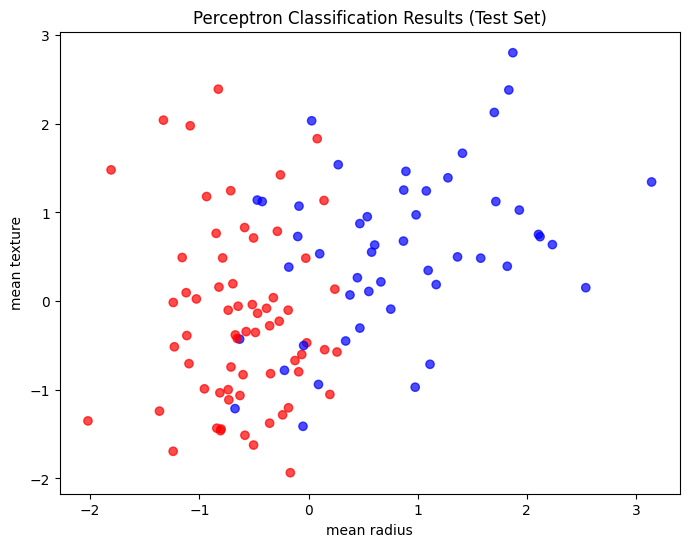

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='bwr', alpha=0.7)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Perceptron Classification Results (Test Set)')
plt.show()

## Analysis of Results
The Perceptron achieved high accuracy on the Breast Cancer Wisconsin dataset, as shown by the printed accuracy and classification report. This indicates that the linear decision boundary found by the Perceptron is effective for this dataset, which is mostly linearly separable. However, the Perceptron can only learn linear boundaries, so its performance may drop on more complex datasets. The visualization of predictions on the first two features shows how the model separates the two classes, but for higher-dimensional data, more advanced models may be needed for better performance.